In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
os.environ["KERAS_BACKEND"] = "torch"

In [2]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

df = pd.read_csv('mnist_test.csv')
x_test = df.drop('label', axis=1)
y_test = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


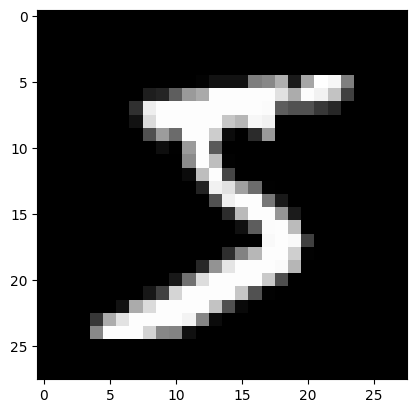

In [3]:
zz = x_train.values[0].reshape(28, 28)
plt.imshow(zz, cmap='gray')
plt.show()

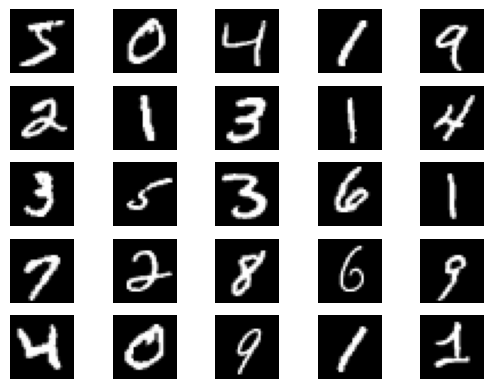

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train.values[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
# https://keras.io/getting_started/intro_to_keras_for_engineers/

#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [6]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train = x_train.values
y_train = y_train.values
x_train = x_train.reshape(x_train.shape[0], 28,28,1)

x_test = x_test.values
y_test = y_test.values
x_test = x_test.reshape(x_test.shape[0], 28,28,1)


print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [8]:

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=callbacks)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 0.9998 - val_loss: 0.0953
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.1763 - val_loss: 0.0595
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.1236 - val_loss: 0.0434
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.0938 - val_loss: 0.0369
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 0.0814 - val_loss: 0.0347
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 0.0711 - val_loss: 0.0285
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 0.0647 - val_loss: 0.0296
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - loss: 0.0527 - val_loss: 0.0300


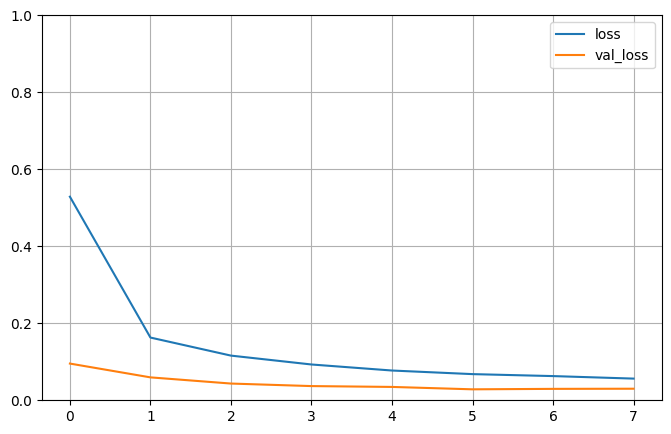

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.save('saved_mnistCONV.keras')

In [ ]:
model = keras.saving.load_model("saved_mnistCONV.keras")

In [10]:
predictions = model.predict(x_test)
predictions[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.8498455e-09, 4.6962861e-10, 3.3271151e-06, 2.7750497e-09,
        4.0303787e-09, 3.5045591e-10, 3.0076740e-15, 9.9989450e-01,
        9.4169195e-10, 1.0215251e-04],
       [1.7360958e-09, 2.0478316e-08, 1.0000000e+00, 1.2226834e-11,
        3.2298615e-08, 5.9400757e-10, 5.4975892e-11, 8.0419317e-11,
        2.4629543e-11, 4.6937775e-12]], dtype=float32)

In [11]:
predictions = [np.argmax(p) for p in predictions]
predictions[:2]

[np.int64(7), np.int64(2)]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 977    0    2    0    0    0    0    0    0    1]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    0 1029    0    1    0    0    1    0    0]
 [   0    1    0 1003    0    4    0    0    1    1]
 [   0    1    2    0  963    0    0    0    2   14]
 [   0    0    2    4    0  884    1    0    0    1]
 [   7    2    5    0    0    1  942    0    1    0]
 [   0    6    4    0    0    0    0 1014    0    4]
 [   0    0    0    1    0    1    0    0  969    3]
 [   3    1    1    0    2    0    0    2    1  999]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99   

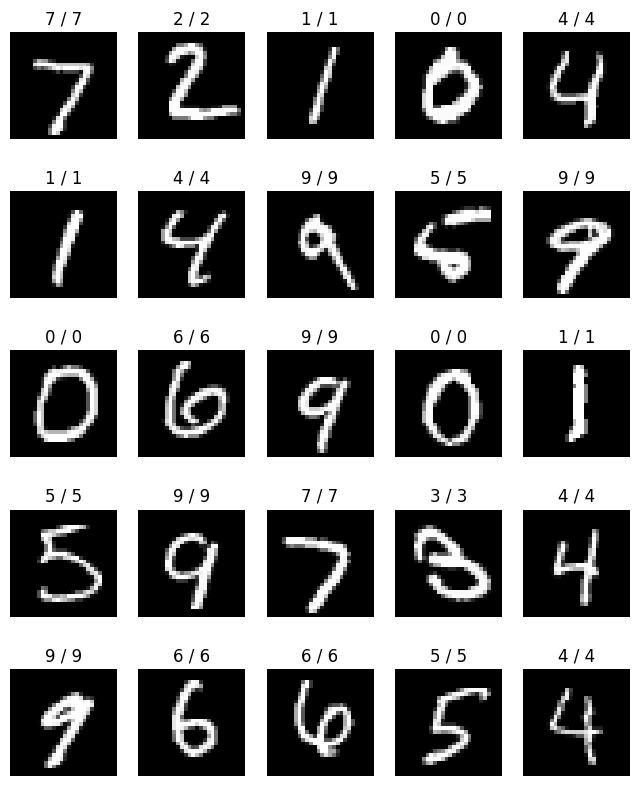

In [13]:
plt.figure(figsize=(8, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'{y_test[i]} / {predictions[i]}')
    plt.axis('off')
plt.show()